# Kernel Support Vector Machines
Apply 4-fold cross-validation to the provided training data subset to train your classifiers and
identify their optimal parameters. In addition to the classifier’s parameters (e.g. regularization,
kernel, Number of layers/nodes, learning rate, etc.), you should also consider the following 4 ways
to preprocess and rescale the data:
- No preprocessing
- StandardScaler
- RobustScaler
- MinMaxScaler

import libraries

In [1]:
import heapq

import mglearn as mglearn
import np as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

import sklearn_evaluation
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.svm import SVC

!pip install numpy scipy scikit-learn matplotlib pandas
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn import metrics
from sklearn.decomposition import PCA

import heapq


You should consider upgrading via the '/Users/engineer/workspace/cse590-machine-learning/venv/bin/python -m pip install --upgrade pip' command.


setup data

general methods

In [2]:
def shape_params_linear_kernel(c_values):
    hyper_params = dict(C=c_values)
    return hyper_params


def shape_params_polynomial_kernel(c_values, d_values):
    hyper_params = shape_params_linear_kernel(c_values)
    hyper_params['degree'] = d_values
    return hyper_params


def shape_params_radial_kernel(c_values, gamma_values):
    hyper_params = shape_params_linear_kernel(c_values)
    hyper_params['gamma'] = gamma_values
    return hyper_params


def run_grid_svm(kernel, hyper_parameters, X_data):
    classifier = SVC(
        kernel=kernel,
        random_state=0
    )
    grid_search = GridSearchCV(
        classifier,
        hyper_parameters,
        cv=4,
        return_train_score=True
    )
    grid_search.fit(X_data, y_train)

    print_grid_search_results(grid_search, hyper_parameters)
    return grid_search


def print_grid_search_results(grid_search, parameters):
    for parameter in parameters:
        print(f'Best {parameter}:', grid_search.best_params_[parameter])
    print("Train score: ", grid_search.cv_results_['mean_train_score'])
    print("Test score: ", grid_search.cv_results_['mean_test_score'])


def preprocess_data(X_scaled):
    pca = PCA(n_components=2)
    pca.fit(X_scaled)

    return pca.fit_transform(X_scaled)


def display_preprocessed_2d(pca_data):
    plt.figure(figsize=(32, 32))
    mglearn.discrete_scatter(pca_data[:, 0], pca_data[:, 1], y_train)
    plt.legend(
        [
            '0: T-shirt/top',
            '1: Trouser',
            '2: Pullover',
            '3: Dress',
            '4: Coat,',
        ],
        loc="best"
    )
    plt.gca().set_aspect("equal")
    plt.xlabel("First principal component")
    plt.ylabel("Second principal component")


def scale(scaler, X_data):
    return scaler.fit(X_data).transform(X_data)


In [3]:
X_train = pd.read_csv("./dataset/X_train.csv").values
y_train = pd.read_csv("./dataset/y_train.csv").values.ravel()
X_test = pd.read_csv("./dataset/X_test.csv").values
y_test = pd.read_csv("./dataset/y_test.csv").values.ravel()

scaler_standard = StandardScaler().fit(X_train)
X_train_standard = scaler_standard.transform(X_train)
X_test_standard = scaler_standard.transform(X_test)
# X_test_standard = fit_and_scale(StandardScaler(), X_test)

scaler_robust = RobustScaler().fit(X_train)
X_train_robust = scaler_robust.transform(X_train)
X_test_robust = scaler_robust.transform(X_test)

# X_train_robust = fit_and_scale(RobustScaler(), X_train)
# X_test_robust = fit_and_scale(RobustScaler(), X_test)
scaler_minmax = MinMaxScaler().fit(X_train)
X_train_minmax = scaler_minmax.transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)

# X_train_minmax = fit_and_scale(MinMaxScaler(), X_train)
# X_test_minmax = fit_and_scale(MinMaxScaler(), X_test)

In [4]:
# scaler_standard = StandardScaler()
# scaler_standard.fit(X_train)
# X_train_scaled_standard = scaler_standard.transform(X_train)
#
# svm = SVC(C=1, kernel='linear')
# svm.fit(X_train, y_train)
# %time print('Accuracy test: ', svm.score(X_test, y_test))

## Kernel Selection
vary only the C values to point in the direction of the best kernel up front

### C-only GridSearch on linear

In [5]:
# %time grid_results_svm_linear = run_grid_svm( 'linear', shape_params_linear_kernel(np.linspace(0,100,2)) )

PCA Eigen

## Standard Scaler

PCA vanilla

In [5]:
svm = SVC(C=1, kernel='linear')
svm.fit(X_train_standard, y_train)
% time print('Accuracy test: ', svm.score(X_test_standard, y_test))

Accuracy test:  0.842368473694739
CPU times: user 4.83 s, sys: 70.1 ms, total: 4.9 s
Wall time: 4.95 s


Text(0, 0.5, 'Second principal component')

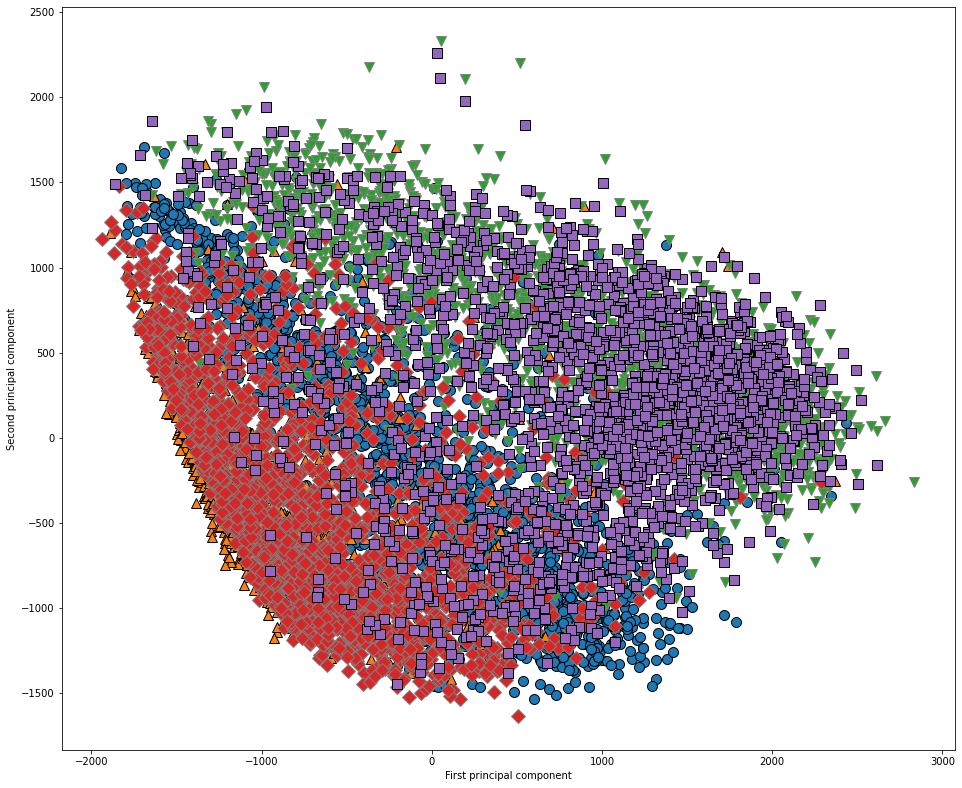

In [6]:
from sklearn.decomposition import PCA

pca_standard = PCA(n_components=2)
pca_standard.fit(X_train)

X_train_pca_scaler = pca_standard.fit_transform(X_train)

# 0: T-shirt/top
# 1: Trouser
# 2: Pullover
# 3: Dress
# 4: Coat
plt.figure(figsize=(16, 16))
mglearn.discrete_scatter(X_train_pca_scaler[:, 0], X_train_pca_scaler[:, 1], y_train)
# plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")


PCA with standard

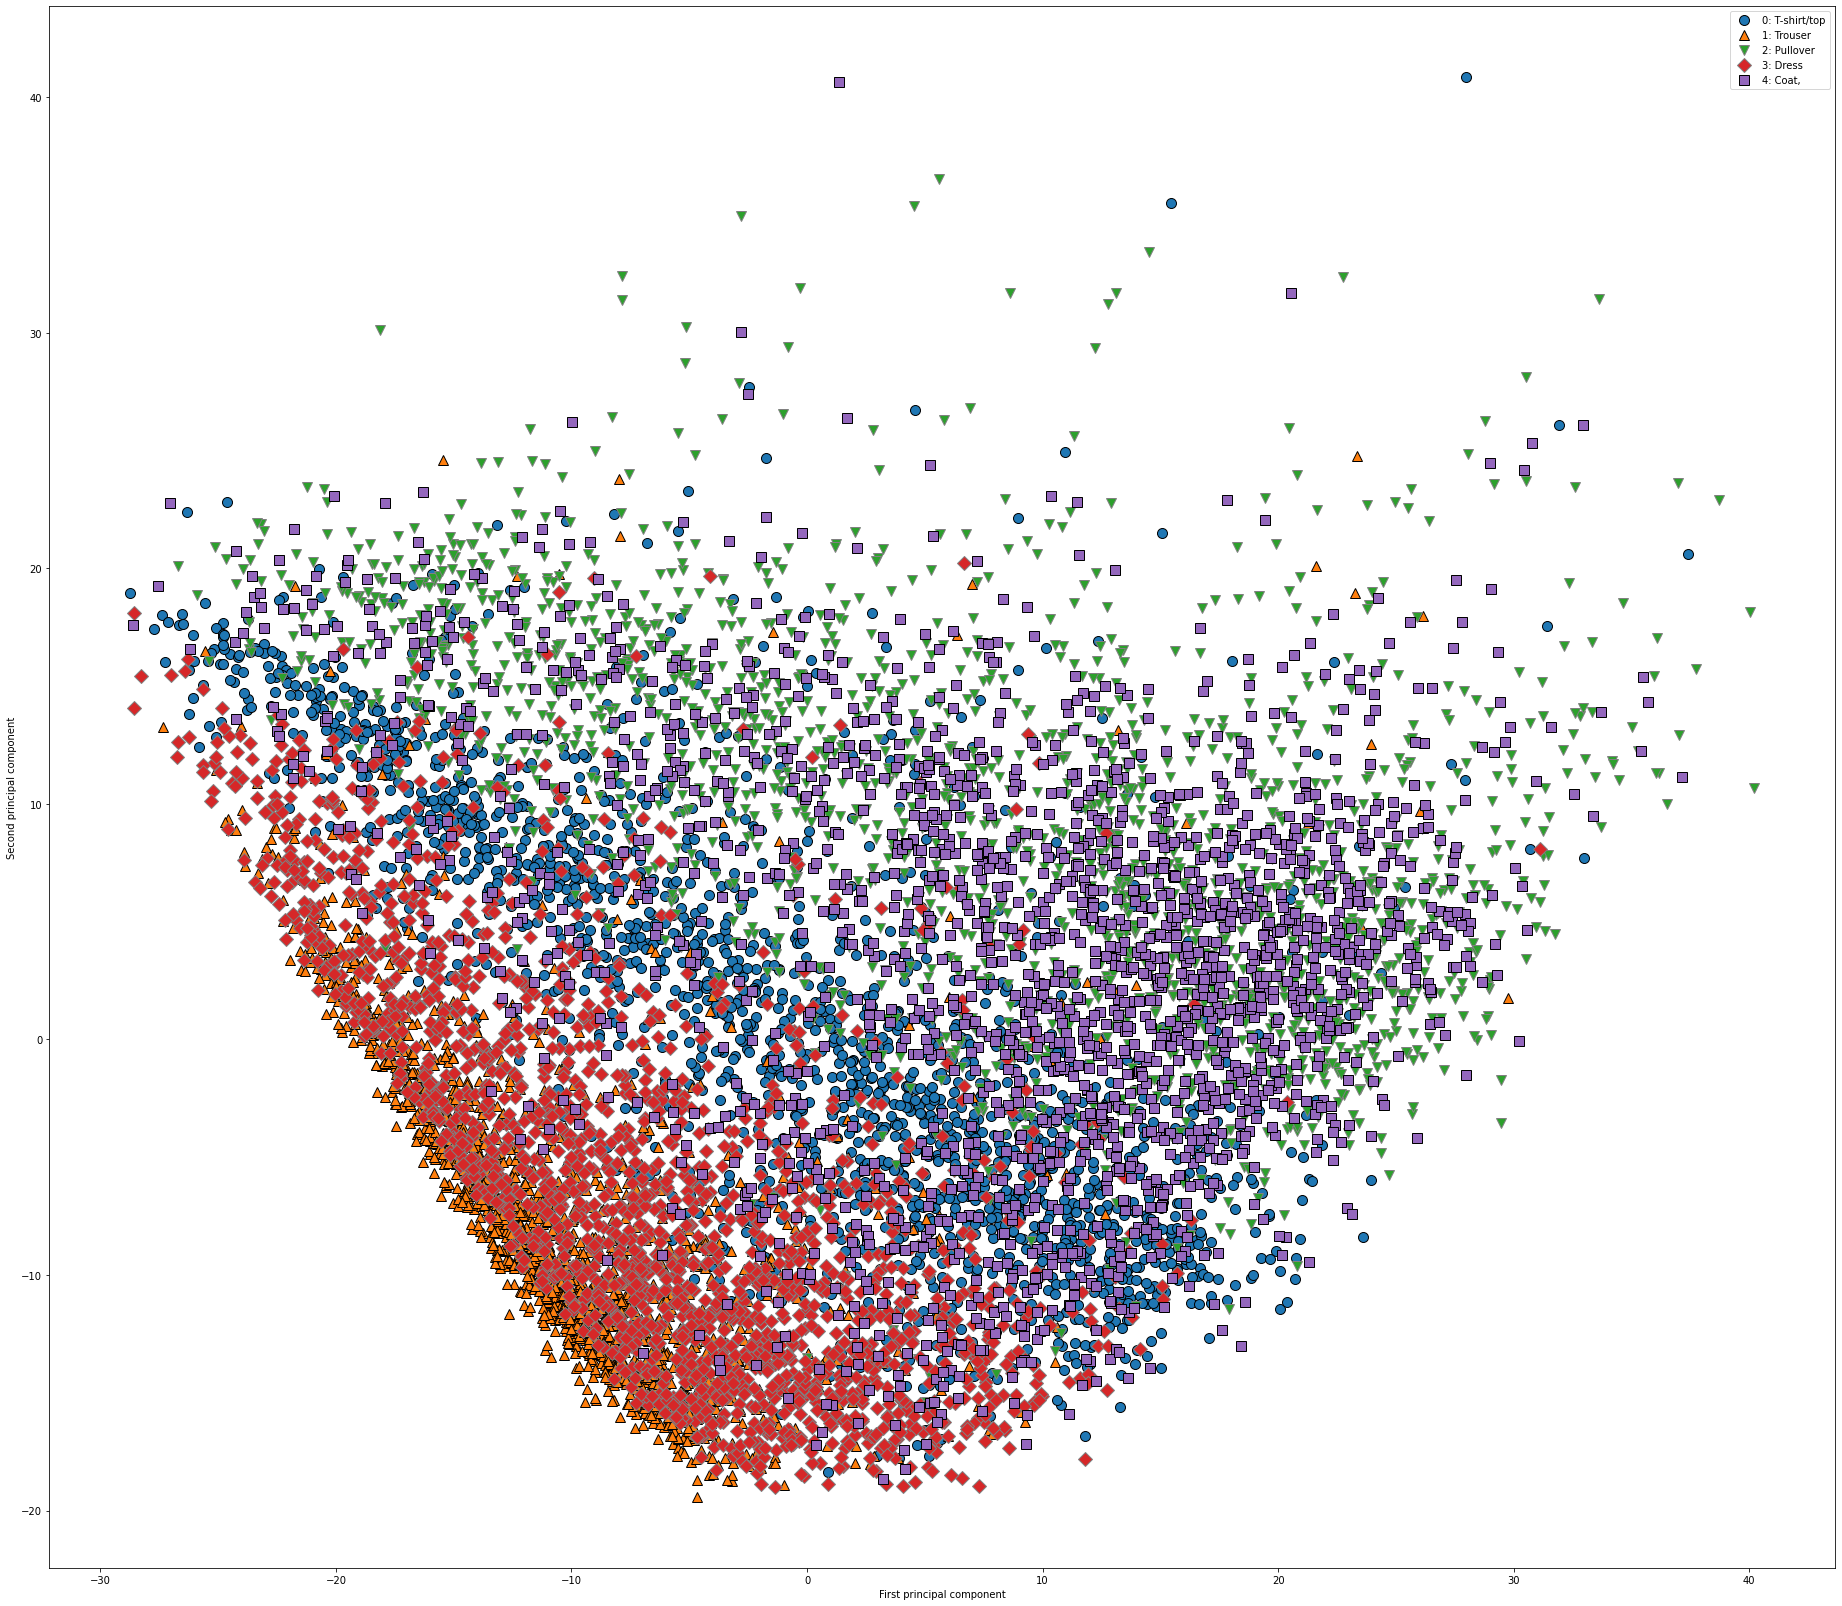

In [7]:
X_pca_standard = preprocess_data(
    scale(StandardScaler(), X_train)
)
display_preprocessed_2d(X_pca_standard)

In [20]:
X_train_standard = scale(StandardScaler(), X_train)
X_test_standard = scale(StandardScaler(), X_test)
svm = SVC(C=1, kernel='poly')
svm.fit(X_train_standard, y_train)
% time print('Accuracy test: ', svm.score(X_test_standard, y_test))

Accuracy test:  0.8731746349269854
CPU times: user 10.2 s, sys: 85.1 ms, total: 10.3 s
Wall time: 10.4 s


## Robust Scaler

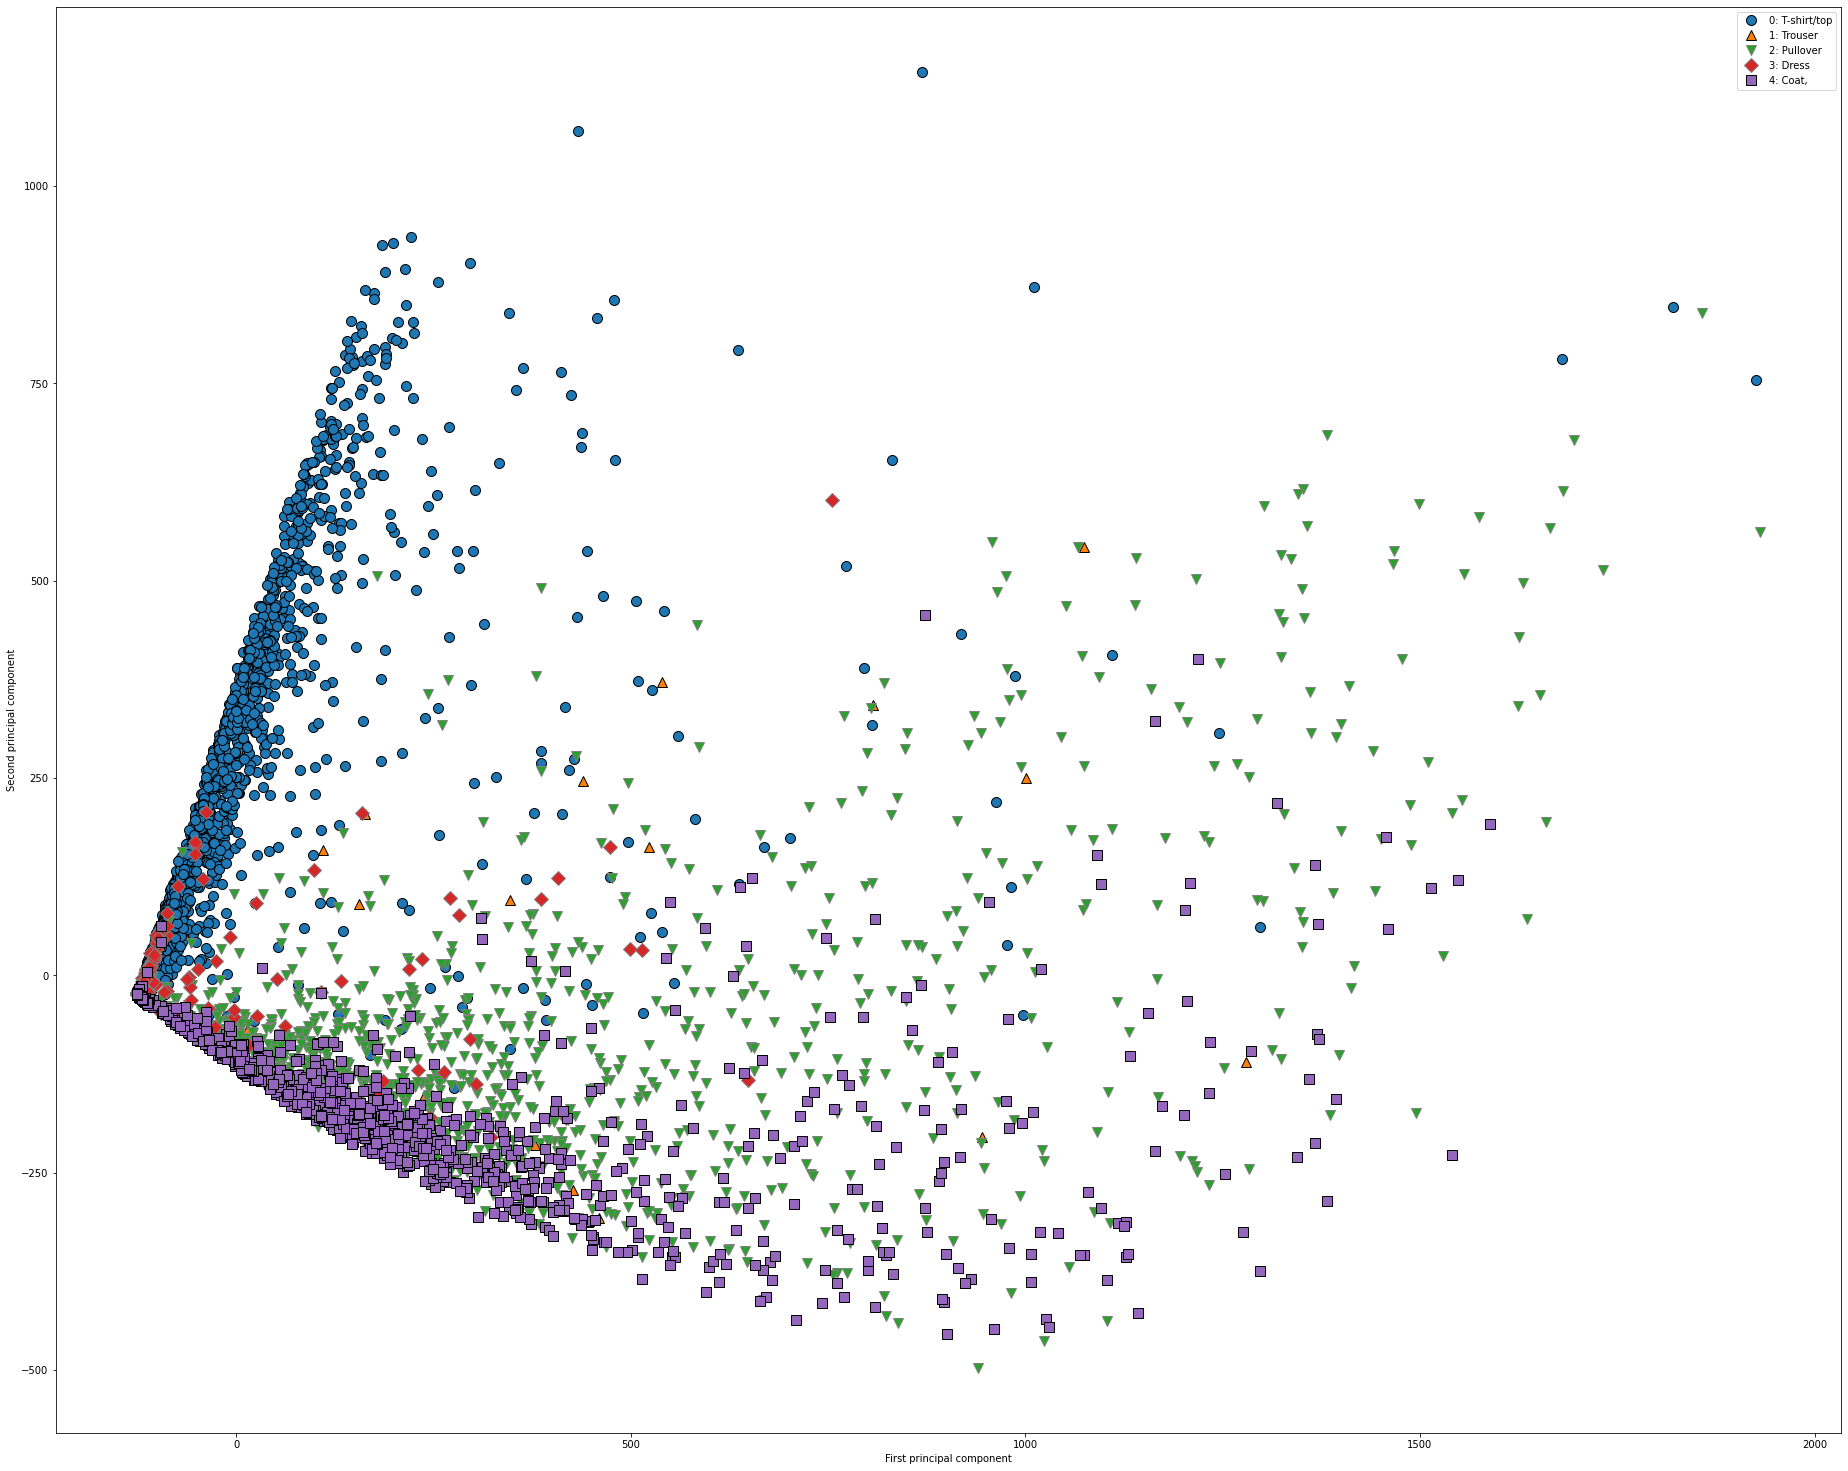

In [10]:
X_pca_standard = preprocess_data(
    scale(RobustScaler(), X_train)
)
display_preprocessed_2d(X_pca_standard)

In [18]:
X_train_standard = scale(RobustScaler(), X_train)
X_test_standard = scale(RobustScaler(), X_test)
svm = SVC(C=1, kernel='rbf')
svm.fit(X_train_standard, y_train)
% time print('Accuracy test: ', svm.score(X_test_standard, y_test))

Accuracy test:  0.7415483096619324
CPU times: user 25.7 s, sys: 175 ms, total: 25.8 s
Wall time: 26.2 s


## MinMax Scaler

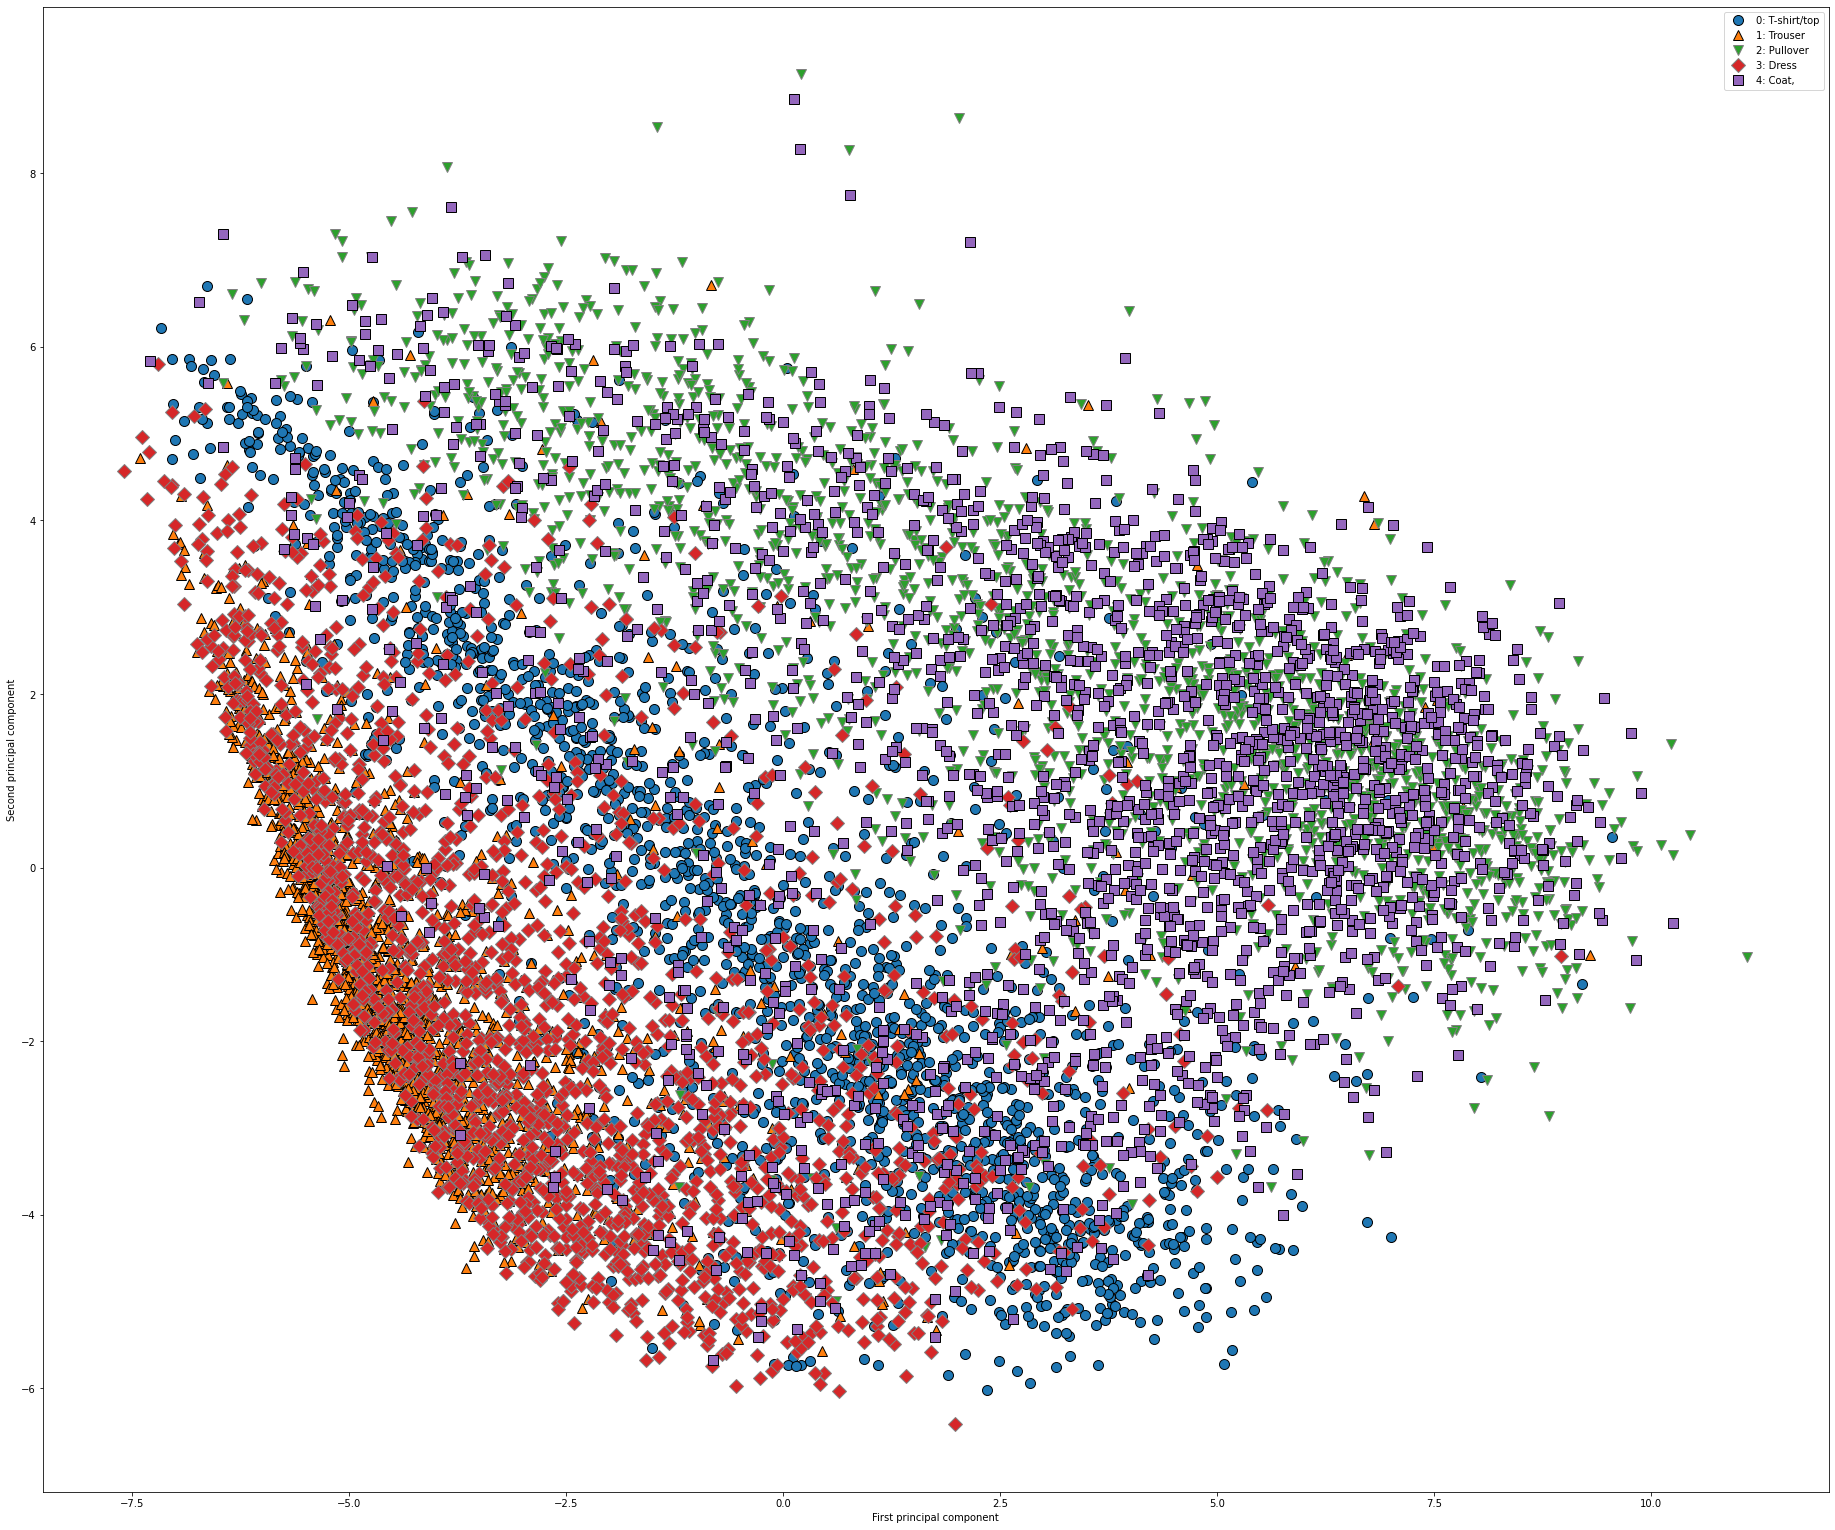

In [12]:
X_pca_standard = preprocess_data(
    scale(MinMaxScaler(), X_train)
)
display_preprocessed_2d(X_pca_standard)

In [16]:
X_train_standard = scale(MinMaxScaler(), X_train)
X_test_standard = scale(MinMaxScaler(), X_test)
svm = SVC(C=1, kernel='poly')
svm.fit(X_train_standard, y_train)
% time print('Accuracy test: ', svm.score(X_test_standard, y_test))

Accuracy test:  0.8755751150230046
CPU times: user 7.34 s, sys: 53.1 ms, total: 7.39 s
Wall time: 7.48 s


# Cross Validation

## Linear
linear and standard

In [4]:
grid_results_linear_standard = run_grid_svm(
    'linear',
    shape_params_linear_kernel([1, 5, 10, 25]),
    X_train_standard
)

KeyboardInterrupt: 

In [ ]:
print(grid_results_linear_standard.cv_results_)

linear and robust

In [ ]:
grid_results_linear_robust = run_grid_svm(
    'linear',
    shape_params_linear_kernel([0.1, 1, 10, 100]),
    X_train_robust
)

linear and minmax

In [7]:
grid_results_linear_minmax = run_grid_svm(
    'linear',
    shape_params_linear_kernel([0.1, 1, 10, 100]),
    X_train_minmax
)
# svm = SVC(C=1, kernel='linear')
# svm.fit(X_train_standard, y_train)
# %time print('Accuracy test: ', svm.score(X_test_standard, y_test))

Best C: 1
Train score:  [0.95782905 0.97379735 0.97739773 0.98023133]
Test score:  [0.86388531 0.84958391 0.84578363 0.84248307]


## Poly
poly and standard

In [9]:
grid_results_poly_standard = run_grid_svm(
    'poly',
    shape_params_polynomial_kernel([1, 5, 10, 25], [1, 2, 3]),
    X_train_standard
)

Best C: 10
Best degree: 3
Train score:  [0.90379036 0.92932618 0.92489243 0.92562583 0.97016366 0.97156379
 0.93556017 0.98323162 0.98583187 0.94946154 0.99453276 0.99669964]
Test score:  [0.88128836 0.88838896 0.875989   0.88248792 0.89978948 0.89909052
 0.87998772 0.89988944 0.90069076 0.87278671 0.8974894  0.89879048]


poly and robust

In [ ]:
grid_results_poly_robust = run_grid_svm(
    'poly',
    shape_params_polynomial_kernel([1, 5, 10, 25], [1, 2, 3]),
    X_train_robust
)

poly and minmax

In [5]:
grid_results_poly_minmax = run_grid_svm(
    'poly',
    shape_params_polynomial_kernel([1, 5, 10, 25], [1, 2, 3]),
    X_train_minmax
)

Best C: 10
Best degree: 2
Train score:  [0.8929226  0.9111577  0.9213922  0.91375801 0.95062836 0.96923029
 0.92285891 0.96889692 0.98306498 0.93779371 0.98763211 0.99193252]
Test score:  [0.87868764 0.88338772 0.87228599 0.88368816 0.89018844 0.88158747
 0.88158796 0.8905882  0.88128739 0.87608743 0.8899884  0.88248727]


## RBF
rbf and standard

In [ ]:
grid_results_rbf_standard = run_grid_svm(
    'rbf',
    shape_params_radial_kernel([1, 25, 50], [.1, 1, 10]),
    X_train_standard
)

rbf and robust

In [1]:
# skip because accuracy terrible
print('hwa')

hwa


robust and minmax

In [6]:
grid_results_rbf_minmax = run_grid_svm(
    'rbf',
    shape_params_radial_kernel([1, 25, 50], [1, 100, 1000]),
    X_train_minmax
)

Best C: 25
Best gamma: 1
Train score:  [1. 1. 1. 1. 1. 1. 1. 1. 1.]
Test score:  [0.33223217 0.27073553 0.20002001 0.35463465 0.27073553 0.20002001
 0.35463465 0.27073553 0.20002001]


In [6]:
svm = SVC(C=10, degree=3, kernel='poly')
svm.fit(X_train_minmax, y_train)
% time print('Accuracy test: ', svm.score(X_test_minmax, y_test))

Accuracy test:  0.8831766353270654
CPU times: user 4.98 s, sys: 30 ms, total: 5.01 s
Wall time: 5.03 s
